In [62]:
# Importing Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses,Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

In [63]:
# Loading Data
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [64]:
# Reshaping Data
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1]**2))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1]**2))

In [65]:
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


In [66]:
# Defining model
input_image = Input(shape=(784,))
encoded = Dense(32,activation = "relu")(input_image)
decoded = Dense(784,activation = "sigmoid")(encoded)

autoencoder = Model(input_image,decoded)

In [67]:
# Compiling the model
autoencoder.compile(optimizer="adam",loss = "binary_crossentropy",metrics = ["mean_squared_error"])

In [68]:
# Model summary
autoencoder.summary()

Model: "model_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_72 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_73 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Fitting data in the model
autoencoder.fit(x_train,x_train,epochs = 16,batch_size = 100,validation_data = (x_test,x_test))

Epoch 1/16
600/600 [==============================] - 2s 2ms/step - loss: 0.2131 - mean_squared_error: 0.0486 - val_loss: 0.1490 - val_mean_squared_error: 0.0276
Epoch 2/16
600/600 [==============================] - 1s 2ms/step - loss: 0.1324 - mean_squared_error: 0.0221 - val_loss: 0.1185 - val_mean_squared_error: 0.0177
Epoch 3/16
600/600 [==============================] - 1s 2ms/step - loss: 0.1130 - mean_squared_error: 0.0160 - val_loss: 0.1063 - val_mean_squared_error: 0.0140
Epoch 4/16
600/600 [==============================] - 1s 2ms/step - loss: 0.1037 - mean_squared_error: 0.0131 - val_loss: 0.0993 - val_mean_squared_error: 0.0118
Epoch 5/16
600/600 [==============================] - 1s 2ms/step - loss: 0.0986 - mean_squared_error: 0.0116 - val_loss: 0.0958 - val_mean_squared_error: 0.0108
Epoch 6/16
600/600 [==============================] - 2s 3ms/step - loss: 0.0961 - mean_squared_error: 0.0109 - val_loss: 0.0941 - val_mean_squared_error: 0.0103
Epoch 7/16
600/600 [========

In [70]:
# Predictions using auto encoder
decoded_images = autoencoder.predict(x_test)

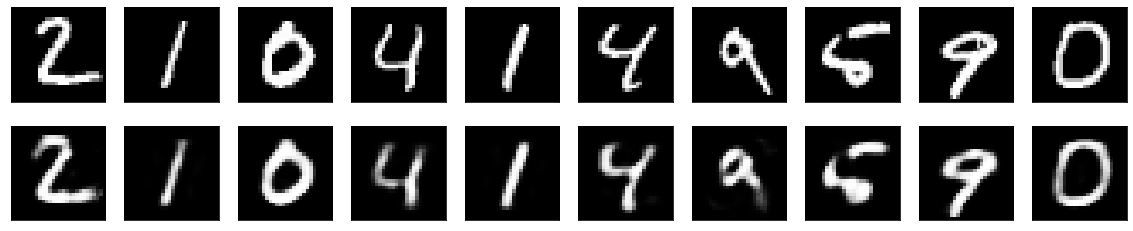

In [71]:
# Plotting original and feature extracted images
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original 
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()